In [1]:
#Accidentalidad Madrid part 3

In [9]:
import pandas as pd
from datetime import datetime,timedelta
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import os
import squarify
import time
import pickle
import datetime

# Importar modelos y otras librerías
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import lazypredict

# podemos añadir los estimadores que nos interesen
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split


In [10]:
df=pd.read_csv('df_part2.csv')
test=pd.read_csv('test_part2.csv')

In [14]:
df

,lesividad,num_implicados,despejado_checked,lluviad_checked,lluviai_checked,nieve_checked,granizo_checked,nublado_nchecked,desconocido_nchecked,cruce,vehi__ciclomotor,vehi__furgoneta,vehi__resto,vehi__turismo,peso_distrito,peso_time_int&age,peso_time_int&acctype,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE,time_int_high,time_int_low,time_int_night,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S
0,Se desconoce,2,1,0,0,0,0,0,0,0,0,0,0,1,6.558540,70.179372,61.517034,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,Se desconoce,2,1,0,0,0,0,0,0,0,0,0,1,0,6.558540,72.386760,61.517034,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,Se desconoce,2,1,0,0,0,0,0,0,0,0,0,0,1,6.558540,62.887646,61.517034,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,Se desconoce,2,1,0,0,0,0,0,0,0,0,0,0,1,6.558540,62.887646,61.517034,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,Se desconoce,2,1,0,0,0,0,0,0,0,0,0,0,1,6.558540,70.179372,75.226213,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32426,Ingreso inferior o igual a 24 horas,2,1,0,0,0,0,0,0,0,0,0,0,1,1.680491,84.042553,72.287459,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
32427,Se desconoce,2,1,0,0,0,0,0,0,0,0,0,0,1,1.680491,73.894231,61.517034,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
32428,Se desconoce,2,1,0,0,0,0,0,0,0,0,0,0,1,1.680491,62.887646,61.517034,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
32429,Se desconoce,2,1,0,0,0,0,0,0,0,0,0,0,1,1.680491,19.347228,18.978102,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

## Creation of PCA's

In [ ]:
#First of all we look at correlation between columns

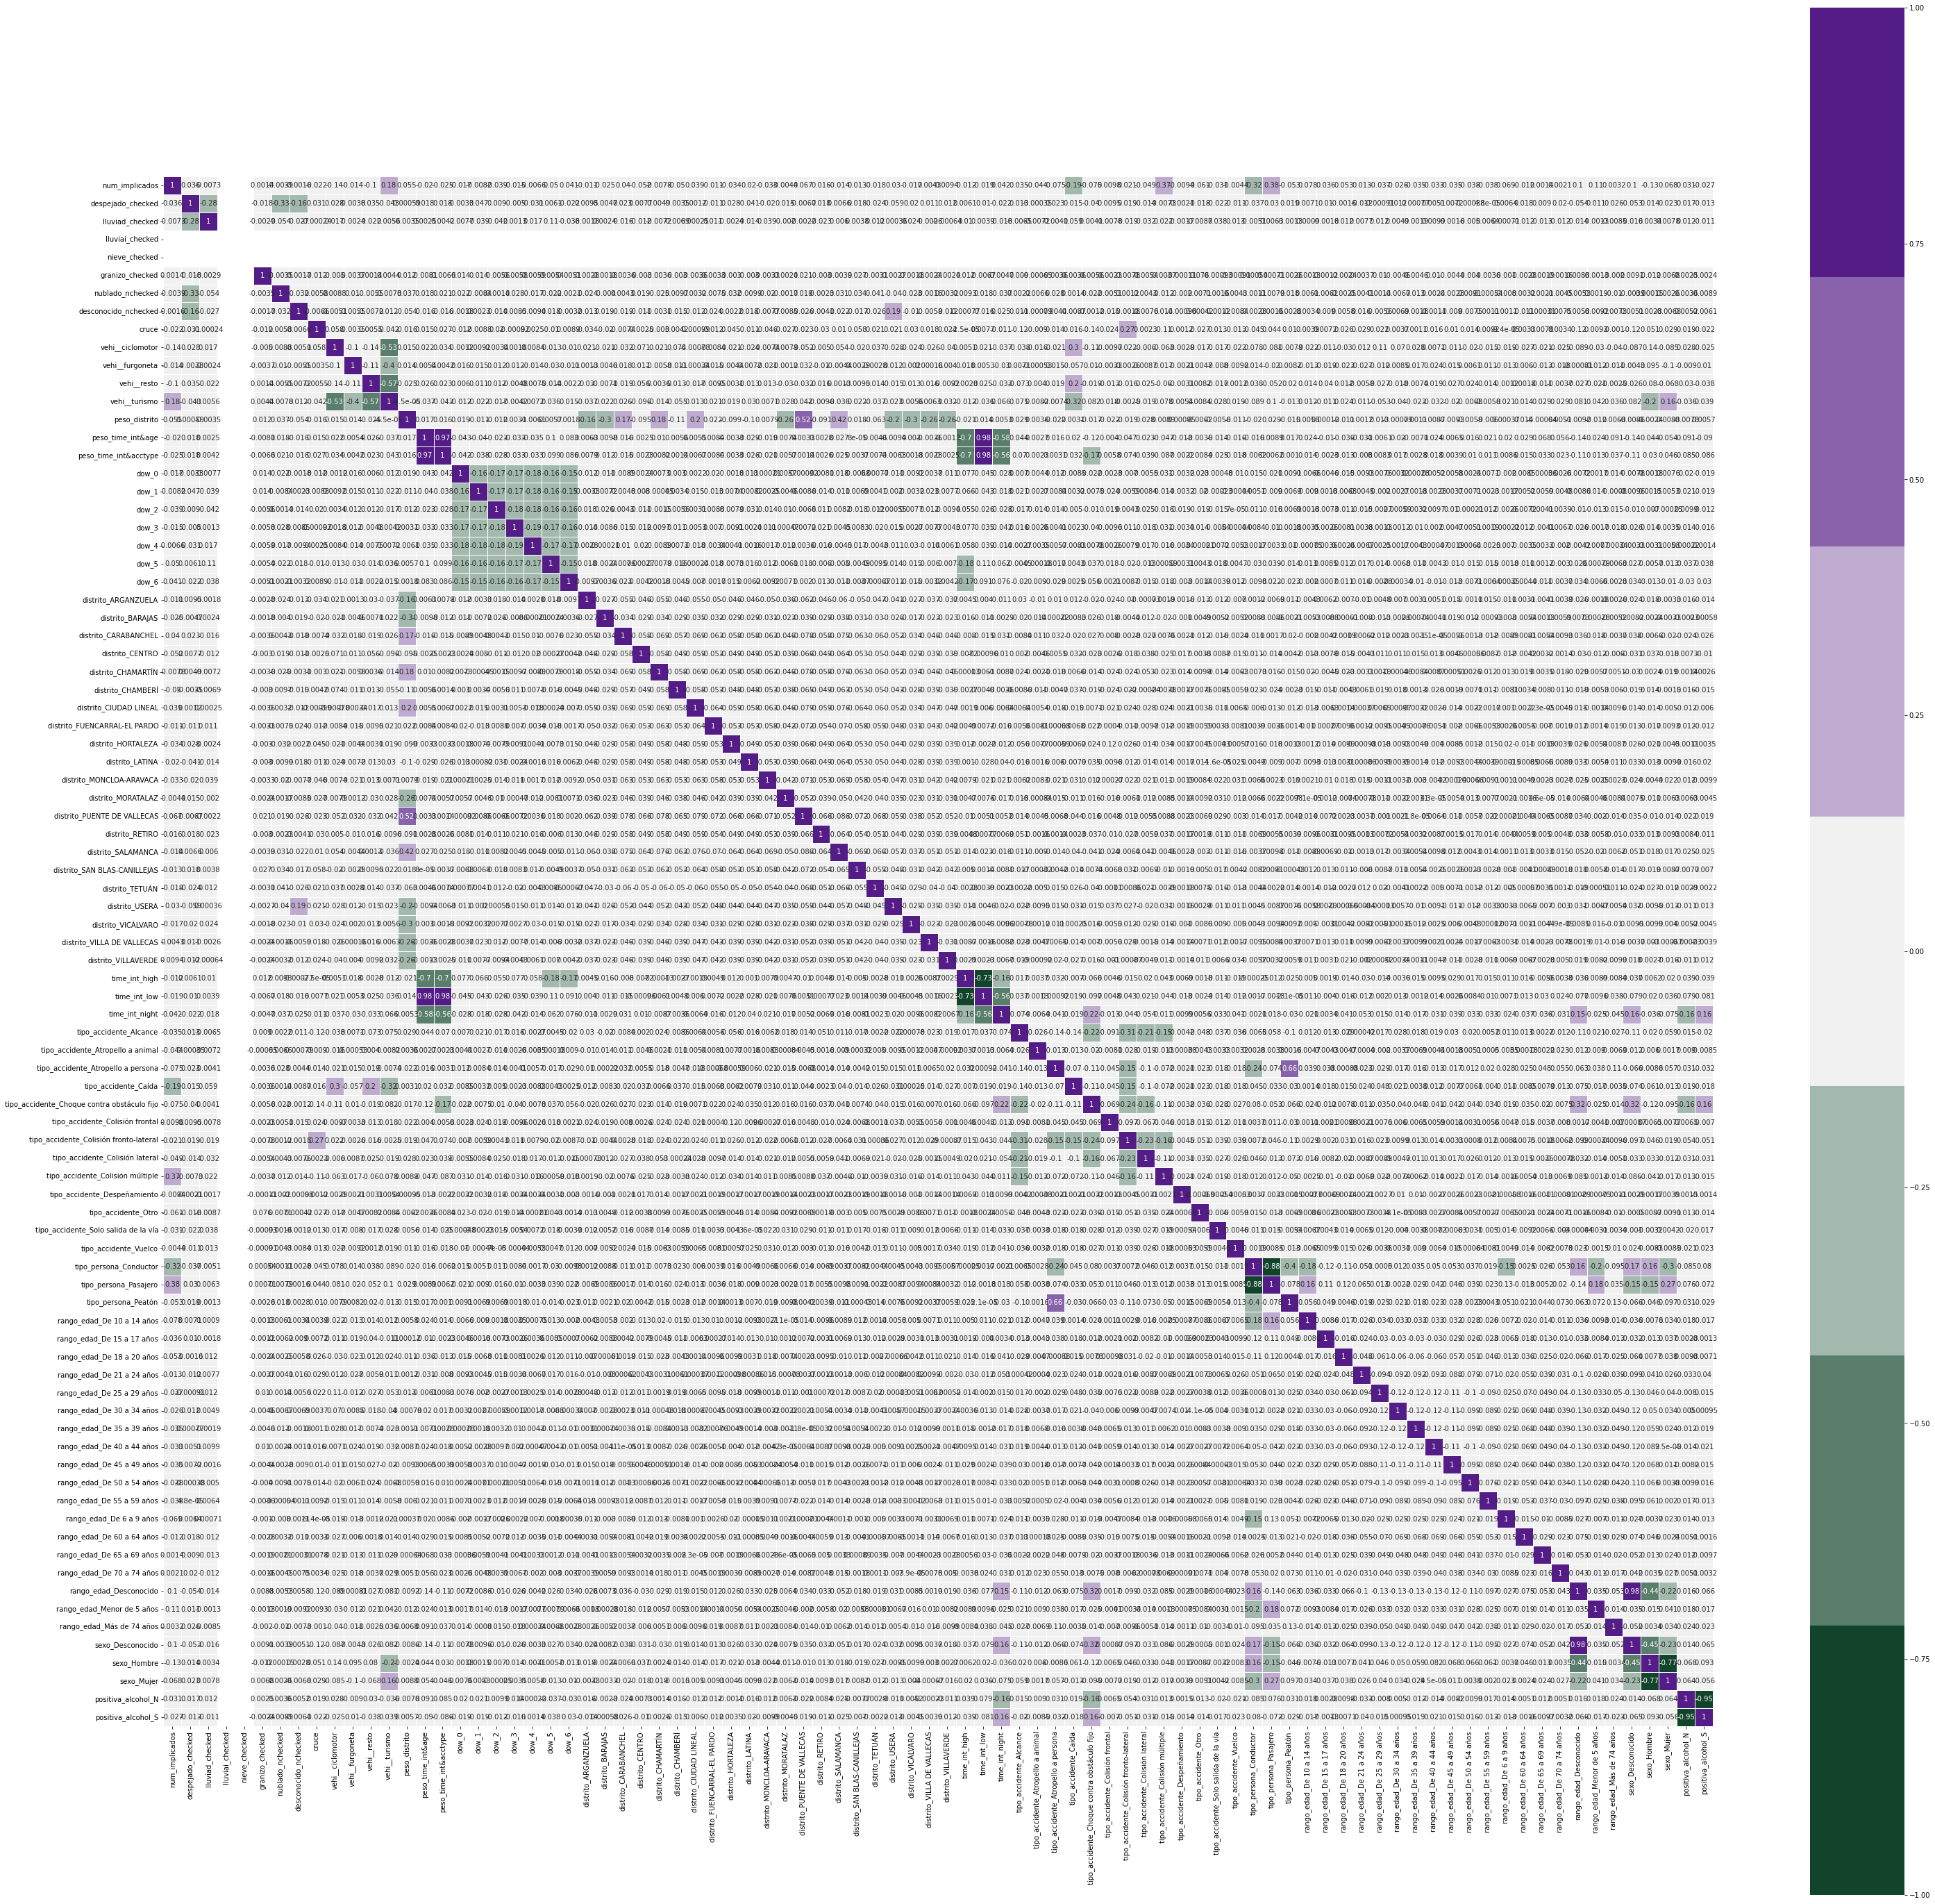

In [13]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot = True,
           square = True,
           linewidths = 0.5);

In [17]:
# The columns lluviai_checked and nieve_checked don't contain info. We will remove them
df1=df.drop(['lluviai_checked','nieve_checked'], axis=1)
test1=test.drop(['lluviai_checked','nieve_checked'], axis=1)

In [39]:
# We will separate the objective column from the others 
target="lesividad"
y_train = df1[target]                                                                                 
y_test = test1[target]
df2 = df1.drop([target], axis=1)
test2 = test1.drop([target], axis=1)

In [40]:
# Normalizing de data with log
df3=df2.apply(lambda x: np.log(x+1))
test3=test2.apply(lambda x: np.log(x+1))

In [41]:
# Now we see the data is adecuated to be precessed (std is less than one in any cases)
df3.describe()

,num_implicados,despejado_checked,lluviad_checked,granizo_checked,nublado_nchecked,desconocido_nchecked,cruce,vehi__ciclomotor,vehi__furgoneta,vehi__resto,vehi__turismo,peso_distrito,peso_time_int&age,peso_time_int&acctype,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE,time_int_high,time_int_low,time_int_night,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S
count,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000,32431.000000
mean,1.284022,0.436821,0.030499,0.000128,0.041998,0.010644,0.295225,0.081474,0.048132,0.091540,0.472001,1.815728,3.875597,3.881141,0.098081,0.097204,0.100132,0.106801,0.111054,0.093314,0.086561,0.028875,0.011648,0.044370,0.032444,0.044541,0.031867,0.045460,0.038172,0.032230,0.032166,0.037531,0.020539,0.056318,0.032701,0.053133,0.038001,0.034154,0.026011,0.011370,0.020860,0.020753,0.118535,0.499978,0.074634,0.155895,0.001603,0.045503,0.045268,0.099748,0.019214,0.172801,0.093699,0.047683,0.000043,0.005365,0.003227,0.003099,0.566940,0.102590,0.023617,0.006519,0.005365,0.020903,0.047662,0.073609,0.071899,0.071300,0.072796,0.066128,0.054351,0.044456,0.003719,0.027229,0.013679,0.009169,0.084081,0.006220,0.014063,0.081346,0.419573,0.192229,0.669872,0.021095
std,0.334494,0.334622,0.142165,0.009427,0.165372,0.085233,0.342754,0.223242,0.176201,0.234677,0.323086,0.273754,0.699024,0.702932,0.241591,0.240687,0.243684,0.250248,0.254255,0.236590,0.229146,0.138497,0.089098,0.169668,0.146413,0.169972,0.145168,0.171595,0.158122,0.145953,0.145815,0.156865,0.117539,0.189383,0.146962,0.184410,0.157788,0.150027,0.131732,0.088047,0.118425,0.11813

In [42]:
df3.shape

(32431, 84)

In [44]:
pcas=[]
for i in range(84):
    pcas.append('PC'+str(i))

In [46]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df3[df3.columns.values[:]])
modelo_pca = pca_pipe.named_steps['pca']
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df3.columns[:],index   = [pcas])

,num_implicados,despejado_checked,lluviad_checked,granizo_checked,nublado_nchecked,desconocido_nchecked,cruce,vehi__ciclomotor,vehi__furgoneta,vehi__resto,vehi__turismo,peso_distrito,peso_time_int&age,peso_time_int&acctype,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE,time_int_high,time_int_low,time_int_night,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S
PC0,4.669569e-03,-5.389165e-03,-7.891862e-04,5.683088e-05,-3.323509e-03,1.329093e-03,-3.912258e-03,-0.005486,-0.001502,-0.005476,0.012464,-0.003576,-6.581884e-01,-6.604879e-01,0.009369,0.008729,0.006029,0.007535,0.008436,-0.022253,-0.017846,-0.000929,0.000729,0.002345,0.000993,-0.001181,-0.000109,-0.001480,-0.001768,0.000153,0.003716,0.003019,-0.001032,-0.000655,-0.000116,-0.004136,-0.000656,-0.000351,0.001132,-0.000245,0.000407,0.000167,0.162874,-0.289871,0.126997,-0.011833,-0.000071,-0.001293,-0.003096,0.024894,-0.000341,-0.012310,-0.005261,0.007853,0.000040,0.000275,0.000631,0.000511,0.001238,-0.000424,-0.000814,-0.000981,0.000249,0.001978,0.002807,0.000164,-0.002525,0.000379,-0.003046,-0.001113,-0.001747,-0.001865,-0.000682,-0.002254,-0.003395,-0.002245,0.019735,-0.000973,-0.004487,0.019823,-0.005951,-0.013873,-1.131290e-02,1.090281e-02
PC1,3.629226e-01,-2.466570e-03,6.005911e-05,2.005029e-04,-1.275317e-03,7.279742e-04,-5.343877e-02,-0.161361,-0.061469,-0.143700,0.366530,0.019035,7.573138e-03,5.393777e-03,-0.008048,-0.007922,-0.017106,-0.009994,0.000979,0.026224,0.015867,-0.007980,-0.001087,0.010249,-0.024365,-0.000047,-0.015915,0.011145,0.004795,0.000216,0.006329,-0.000301,0.003550,0.021102,-0.000335,-0.008723,0.008446,-0.011632,0.003266,-0.000753,-0.000085,0.002125,-0.017258,-0.001215,0.018474,0.052930,-0.001064,0.009589,-0.089881,0.024496,0.001270,-0.021388,-0.029349,0.055598,-0.000020,-0.003464,0.000410,0.000875,-0.284386,0.263939,0.020447,0.011657,0.006276,0.014769,0.003779,-0.021865,-0.019818,-0.024857,-0.037511,-0.029104,-0.022640,-0.017380,0.007546,-0.005587,0.003087,0.004354,0.103843,0.015317,0.008134,0.101255,-0.538954,0.437699,1.760959e-02,-1.918183e-02
PC2,-1.846157e-01,-1.677314e-01,1.304271e-02,2.354642e-04,1.546250e-02,5.908019e-03,-4.067900e-01,-0.067501,-0.013540,-0.025405,0.106446,-0.020213,1.453099e-02,2.201968e-02,-0.000102,-0.012464,-0.012888,-0.024862,-0.005480,0.026440,0.029357,-0.002015,0.006847,0.008218,-0.006484,-0.009634,-0.003743,-0.002320,0.010511,0.003286,0.015737,0.008387,0.007238,0.011127,-0.006722,-0.025065,-0.009081,-0.010383,0.005626,0.000678,-0.004503,0.002294,-0.085857,0.014130,0.071727,-0.010368,0.000855,-0.030677,-0.009977,0.290090,-0.000368,-0.287117,0.0124

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27086412 0.33064809 0.37418425 0.41032582 0.44408891 0.47387896
 0.50207437 0.52623669 0.54826453 0.56931278 0.58891187 0.60764785
 0.62544495 0.64239719 0.65913098 0.67576099 0.69126433 0.70651599
 0.71932388 0.73174938 0.74407192 0.75630559 0.76839499 0.78000171
 0.79124407 0.80155808 0.81125077 0.82034732 0.82877398 0.83700502
 0.84489789 0.85272114 0.86037339 0.86778636 0.87469493 0.88132946
 0.88791627 0.89433769 0.90045895 0.90649197 0.91224351 0.91783182
 0.92338361 0.92885047 0.93429162 0.93956282 0.94461729 0.94955349
 0.95432724 0.95875911 0.96251423 0.96620738 0.96976478 0.97331187
 0.97673916 0.97943866 0.98202702 0.9844025  0.98666186 0.9886236
 0.99027809 0.99187363 0.9932207  0.99435507 0.99542193 0.99644901
 0.99738921 0.99804191 0.99866908 0.99920501 0.99950418 0.99979586
 0.99997037 0.99999211 1.         1.         1.         1.
 1.      

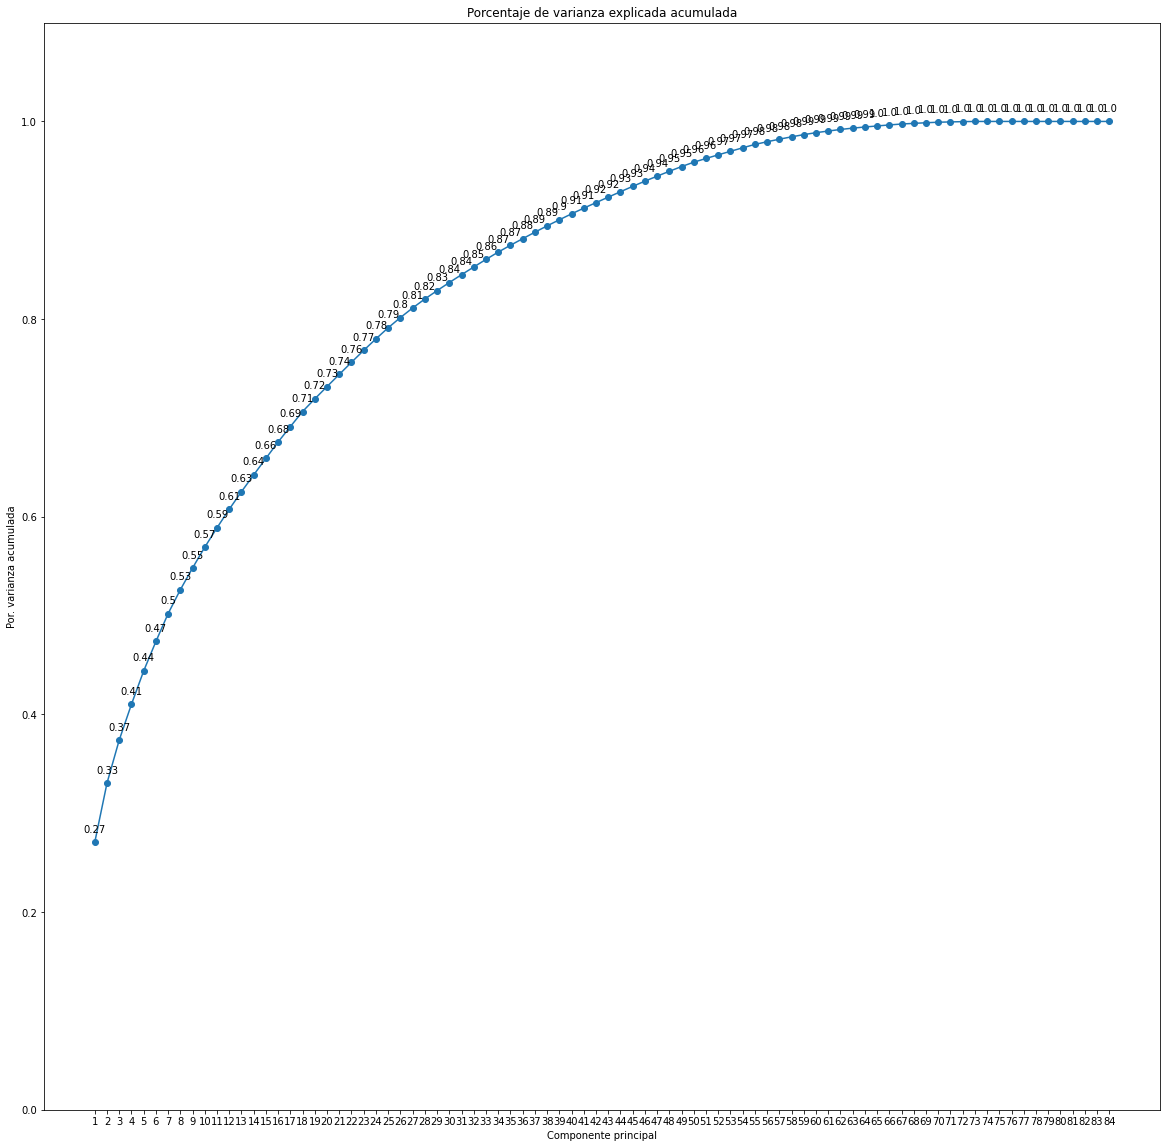

In [47]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
ax.plot(
    np.arange(len(df3.columns[:])) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df3.columns[:])) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

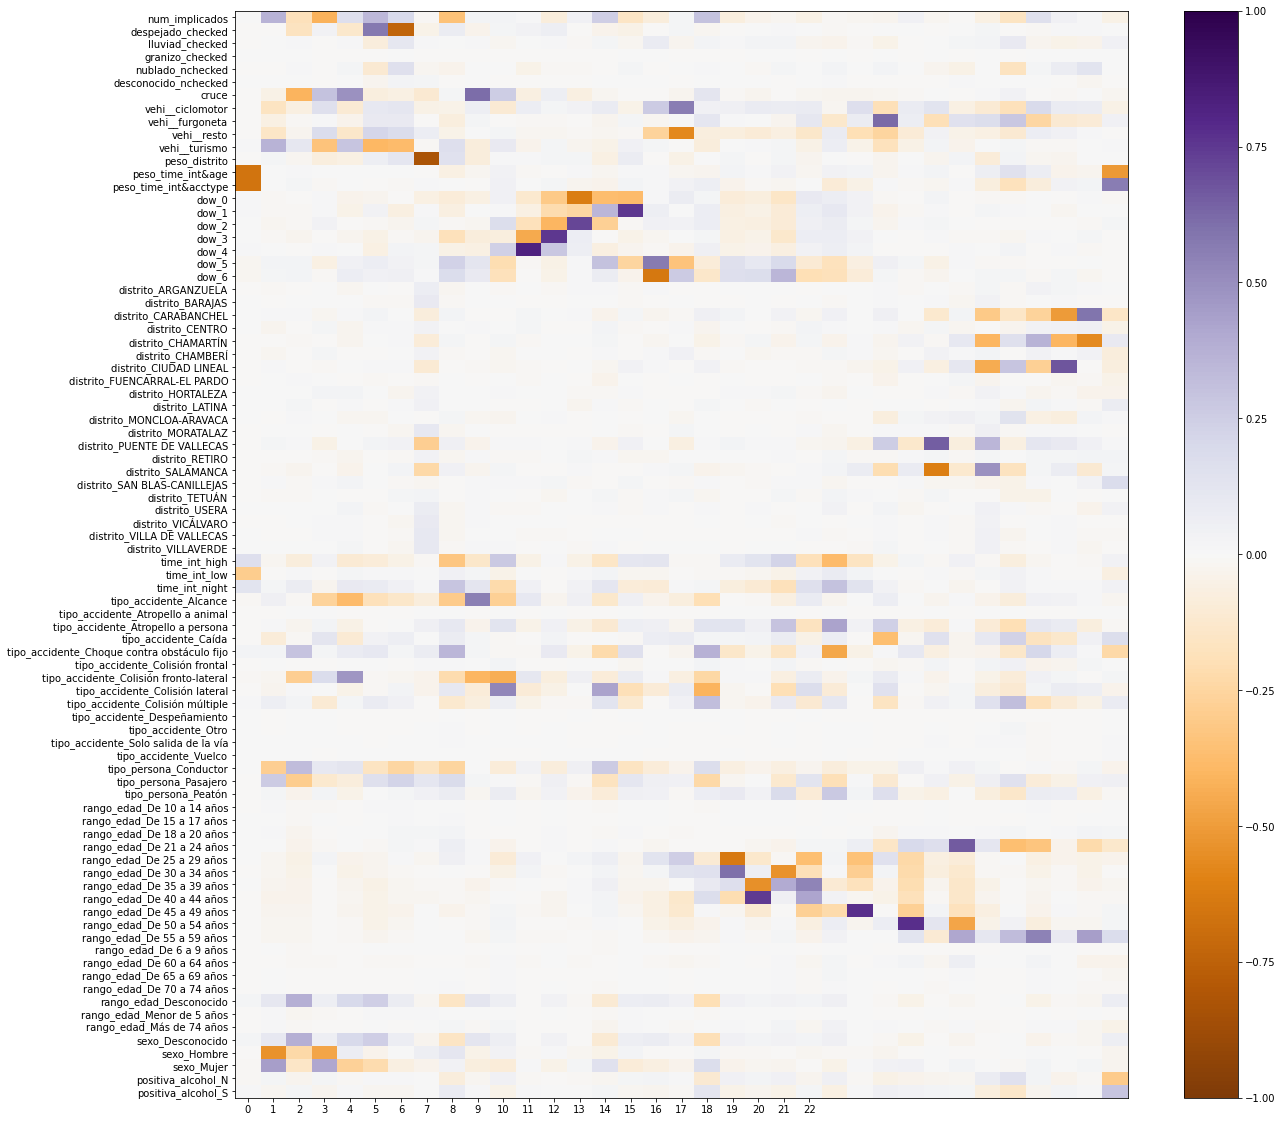

In [48]:
# We will take 35 PCAs (it correspond to the 0.87% of cumulative variance)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
componentes = modelo_pca.components_
plt.imshow(componentes[0:35].T, cmap='PuOr', aspect='auto',vmin = -1,vmax = 1)
plt.yticks(range(len(df3.columns[:])), df3.columns[:])
plt.xticks(range(23))
plt.grid(False)
plt.colorbar();

In [49]:
proyecciones = pca_pipe.transform(df3)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = [pcas],
    index   = df3.index
              )
proyecciones

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83
0,-0.484112,-0.216679,0.328489,-0.315837,-0.020117,0.039075,-0.309475,-0.145702,0.343299,-0.291385,-0.077494,-0.338376,0.603535,0.012771,-0.202174,0.116809,-0.007127,-0.007302,0.246190,-0.120871,-0.075954,-0.172139,0.028632,-0.174857,0.016049,-0.184438,0.231207,0.044296,0.529082,-0.234227,-0.064294,-0.309436,0.457368,-0.144826,-0.375925,0.071812,-0.066309,0.006174,0.059087,-0.127891,0.025050,0.006216,-0.022444,0.033335,0.001901,-0.069137,-0.031759,-0.087536,0.004747,0.014593,0.028469,-0.013964,0.008373,-0.006731,-0.011712,0.014751,-0.040985,-0.001627,-0.022745,0.004380,-0.015780,0.001704,0.058840,0.012544,0.006003,-0.006512,0.002591,0.002352,0.001117,-0.004229,-0.000997,-0.003392,0.003957,0.000693,0.000392,-9.908032e-15,-5.531222e-15,-3.255794e-16,-2.117015e-16,-1.081215e-15,-6.733370e-16,2.464035e-16,-7.494005e-16,9.159340e-16
1,-0.523972,0.089077,0.285301,0.677515,-0.575337,0.321879,0.020671,-0.182613,0.136953,-0.255536,-0.253274,-0.286500,0.535800,0.073292,-0.022003,-0.020140,-0.146301,-0.246831,0.285588,-0.632467,-0.229866,-0.234572,-0.287532,-0.181708,-0.361448,0.007179,-0.066674,-0.106315,0.022007,-0.355984,0.092236,-0.059448,0.491614,0.001238,-0.339686,0.019925,-0.071660,0.009321,-0.007864,-0.073539,0.039654,-0.004008,-0.011011,0.010326,-0.001581,-0.047245,-0.063595,-0.024874,-0.058262,-0.014748,0.027884,-0.011272,0.015093,-0.010229,0.009418,0.008196,-0.018444,0.005098,-0.006945,-0.004429,-0.006718,0.005526,0.041374,0.010469,0.010558,-0.004676,-0.006066,0.005692,0.006324,-0.001165,0.001003,-0.002744,0.001078,0.000028,0.000466,-1.190213e-14,1.163393e-14,-4.185245e-15,9.633111e-16,-1.353217e-15,1.021413e-16,-7.473877e-16,-6.522560e-16,-2.151057e-16
2,-0.383378,0.295621,1.038952,0.100863,0.202038,0.409157,-0.228793,-0.227605,0.016087,-0.094589,-0.000748,-0.332930,0.632765,0.017626,-0.325802,0.184934,0.107245,0.056961,-0.030031,-0.052382,-0.013811,-0.105142,0.063994,-0.110627,-0.007166,-0.079581,0.031293,-0.080240,0.041940,-0.319826,0.179103,-0.150940,0.470762,-0.010675,-0.130745,0.029502,-0.101765,-0.007616,0.024996,-0.026606,0.021215,-0.019273,-0.017070,0.029050,-0.018978,-0.050329,0.003592,-0.034656,0.003533,-0.004595,0.022725,-0.004444,0.012853,0.006403,-0.000458,0.007501,-0.023630,0.003939,-0.012110,0.003122,-0.011397,0.006461,0.105851,0.007653,0.003751,-0.008747,-0.001245,0.002540,0.002027,-0.003244,-0.009979,-0.003451,-0.014133,0.000275,0.000280,-8.455201e-15,-5.616224e-15,-1.088858e-15,2.566738e-16,-1.091623e-15,-3.680256e-16,-1.768690e-16,-6.106227e-16,6.522560e-16
3,-0.383378,0.295621,1.038952,0.100863,0.202038,0.409157,-0.228793,-0.227605,0.016087,-0.094589,-0.000748,-0.332930,0.632765,0.017626,-0.325802,0.184934,0.107245,0.056961,-0.030031,-0.052382,-0.013811,-0.105142,0.063994,-0.110627,-0.007166,-0.079581,0.031293,-0.080240,0.041940,-0.319826,0.179103,-0.150940,0.470762,-0.010675,-0.130745,0.029502,-0.101765,-0.007616,0.024996,-0.026606,0.021215,-0.019273,-0.017070,0.029050,-0.018978,-0.050329,0.003592,-0.034656,0.003533,-0.004595,0.022725,-0.004444,0.012853,0.006403,-0.000458,0.007501,-0.023630,0.003939,-0.012110,0.003122,-0.011397,0.006461,0.105851,0.007653,0.003751,-0.008747,-0.001245,0.002540,0.002027,-0.003244,-0.009979,-0.003451,-0.014133,0.000275,0.000280,-8.455201e-15,-5.616224e-15,-1.088858e-15,2.566738e-16,-1.091623e-15,-3.680256e-16,-1.768690e-16,-6.106227e-16,6.522560e-16
4,-0.640521,-0.195901,0.124594,-0.512759,-0.336491,-0.156766,-0.422168,-0.251017,-0.103218,0.076520,-0.250523,-0.259097,0.525234,0.073483,-0.144299,0.053249,-0.023181,-0.033568,-0.138652,-0.034219,-0.051153,-0.113123,0.061103,0

In [50]:
X_train=proyecciones[pcas[:35]]

In [51]:
X_train

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,-0.484112,-0.216679,0.328489,-0.315837,-0.020117,0.039075,-0.309475,-0.145702,0.343299,-0.291385,-0.077494,-0.338376,0.603535,0.012771,-0.202174,0.116809,-0.007127,-0.007302,0.246190,-0.120871,-0.075954,-0.172139,0.028632,-0.174857,0.016049,-0.184438,0.231207,0.044296,0.529082,-0.234227,-0.064294,-0.309436,0.457368,-0.144826,-0.375925
1,-0.523972,0.089077,0.285301,0.677515,-0.575337,0.321879,0.020671,-0.182613,0.136953,-0.255536,-0.253274,-0.286500,0.535800,0.073292,-0.022003,-0.020140,-0.146301,-0.246831,0.285588,-0.632467,-0.229866,-0.234572,-0.287532,-0.181708,-0.361448,0.007179,-0.066674,-0.106315,0.022007,-0.355984,0.092236,-0.059448,0.491614,0.001238,-0.339686
2,-0.383378,0.295621,1.038952,0.100863,0.202038,0.409157,-0.228793,-0.227605,0.016087,-0.094589,-0.000748,-0.332930,0.632765,0.017626,-0.325802,0.184934,0.107245,0.056961,-0.030031,-0.052382,-0.013811,-0.105142,0.063994,-0.110627,-0.007166,-0.079581,0.031293,-0.080240,0.041940,-0.319826,0.179103,-0.150940,0.470762,-0.010675,-0.130745
3,-0.383378,0.295621,1.038952,0.100863,0.202038,0.409157,-0.228793,-0.227605,0.016087,-0.094589,-0.000748,-0.332930,0.632765,0.017626,-0.325802,0.184934,0.107245,0.056961,-0.030031,-0.052382,-0.013811,-0.105142,0.063994,-0.110627,-0.007166,-0.079581,0.031293,-0.080240,0.041940,-0.319826,0.179103,-0.150940,0.470762,-0.010675,-0.130745
4,-0.640521,-0.195901,0.124594,-0.512759,-0.336491,-0.156766,-0.422168,-0.251017,-0.103218,0.076520,-0.250523,-0.259097,0.525234,0.073483,-0.144299,0.053249,-0.023181,-0.033568,-0.138652,-0.034219,-0.051153,-0.113123,0.061103,0.105164,0.041414,-0.145555,0.167492,0.065777,0.556715,-0.247837,-0.059105,-0.437288,0.445725,-0.139785,-0.116088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32426,-0.732147,0.633328,-0.024399,0.367211,-0.386719,-0.082983,-0.352563,0.933091,0.269291,-0.249076,0.276105,-0.212957,-0.207427,0.401704,-0.381332,0.041425,0.130290,0.069732,0.123009,0.149712,0.049859,0.346874,-0.155102,0.663798,0.109485,0.309038,-0.071577,-0.042130,0.002065,0.006537,-0.186754,0.114796,0.122402,-0.123316,-0.091383
32427,-0.516640,-0.264102,0.376880,-0.193032,0.046064,-0.016844,-0.480101,0.876545,0.262889,-0.172226,0.132649,-0.168704,-0.226424,0.441155,-0.334424,0.036498,0.025638,0.050052,0.236478,-0.119577,-0.071306,-0.131381,0.015505,-0.161863,-0.008545,-0.037090,0.156838,-0.045149,0.259998,0.192347,0.195790,0.506054,0.101623,0.290658,-0.129686
32428,-0.379184,0.262478,1.074560,0.216248,0.276454,0.364243,-0.378600,0.798405,-0.020232,0.047849,0.172066,-0.156674,-0.181864,0.443746,-0.439020,0.096392,0.140166,0.135837,-0.025981,-0.064439,-0.018244,-0.100710,0.089446,-0.110320,0.007030,-0.031841,0.008097,0.012012,-0.054041,0.109468,-0.047432,0.054487,0.034444,-0.033458,-0.069450
32429,1.402950,-0.357715,0.101066,-0.206182,-0.118885,-0.193097,-0.535369,0.783077,0.009795,-0.300914,0.593757,-0.231395,-0.315520,0.456868,0.111469,-0.181467,-0.024918,0.064455,-0.177996,-0.034075,0.004026,-0.060601,-0.010619,-0.207929,-0.089225,0.153392,0.597895,0.162645,-0.265320,-0.056553,-0.251506,-0.102191,0.079573,0.017572,0.397512


In [56]:
# We will do the same for test
pd.set_option('display.max_rows', 200)
test3.isnull().sum()

num_implicados                                 0
despejado_checked                              0
lluviad_checked                                0
granizo_checked                                0
nublado_nchecked                               0
desconocido_nchecked                           0
cruce                                          0
vehi__ciclomotor                               0
vehi__furgoneta                                0
vehi__resto                                    0
vehi__turismo                                  0
peso_distrito                                  0
peso_time_int&age                              0
peso_time_int&acctype                          4
dow_0                                          0
dow_1                                          0
dow_2                                          0
dow_3                                          0
dow_4                                          0
dow_5                                          0
dow_6               

In [60]:
# there are 4 values in test with nan. will remove these rows
test4=test3.dropna()
print(test3.shape)
print(test4.shape)

(41780, 84)
(41776, 84)


In [61]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(test4[test4.columns.values[:]])
modelo_pca = pca_pipe.named_steps['pca']
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = test4.columns[:],index   = [pcas])

,num_implicados,despejado_checked,lluviad_checked,granizo_checked,nublado_nchecked,desconocido_nchecked,cruce,vehi__ciclomotor,vehi__furgoneta,vehi__resto,vehi__turismo,peso_distrito,peso_time_int&age,peso_time_int&acctype,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,distrito_FUENCARRAL-EL PARDO,distrito_HORTALEZA,distrito_LATINA,distrito_MONCLOA-ARAVACA,distrito_MORATALAZ,distrito_PUENTE DE VALLECAS,distrito_RETIRO,distrito_SALAMANCA,distrito_SAN BLAS-CANILLEJAS,distrito_TETUÁN,distrito_USERA,distrito_VICÁLVARO,distrito_VILLA DE VALLECAS,distrito_VILLAVERDE,time_int_high,time_int_low,time_int_night,tipo_accidente_Alcance,tipo_accidente_Atropello a animal,tipo_accidente_Atropello a persona,tipo_accidente_Caída,tipo_accidente_Choque contra obstáculo fijo,tipo_accidente_Colisión frontal,tipo_accidente_Colisión fronto-lateral,tipo_accidente_Colisión lateral,tipo_accidente_Colisión múltiple,tipo_accidente_Despeñamiento,tipo_accidente_Otro,tipo_accidente_Solo salida de la vía,tipo_accidente_Vuelco,tipo_persona_Conductor,tipo_persona_Pasajero,tipo_persona_Peatón,rango_edad_De 10 a 14 años,rango_edad_De 15 a 17 años,rango_edad_De 18 a 20 años,rango_edad_De 21 a 24 años,rango_edad_De 25 a 29 años,rango_edad_De 30 a 34 años,rango_edad_De 35 a 39 años,rango_edad_De 40 a 44 años,rango_edad_De 45 a 49 años,rango_edad_De 50 a 54 años,rango_edad_De 55 a 59 años,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,sexo_Desconocido,sexo_Hombre,sexo_Mujer,positiva_alcohol_N,positiva_alcohol_S
PC0,-6.207177e-03,-8.800795e-04,-9.162575e-04,3.258975e-05,-3.114064e-03,2.997848e-04,-5.518660e-04,-0.004448,-0.002436,-0.001367,0.008251,-0.004558,-6.558878e-01,-6.641475e-01,0.009556,0.009402,0.003284,0.011086,0.006944,-0.025953,-0.014320,0.000358,-0.000726,-0.000912,0.003514,-0.000992,-0.001152,-0.002332,-0.001540,0.000414,0.002052,-0.000154,0.003015,-0.003478,-0.002207,0.002159,0.001327,-0.000486,-0.000985,0.000057,0.002213,-0.000146,0.162940,-0.288466,0.125526,-0.011357,-3.166580e-04,-0.001890,-0.000267,0.022549,-0.000544,-0.004870,-0.003780,-0.000609,0.000091,-0.000562,0.001062,0.000494,4.447542e-03,-3.100307e-03,-1.320310e-03,-0.001310,-0.000532,0.001698,0.007060,0.001704,0.000969,-0.000971,-0.001565,-0.003472,-0.002561,-0.001576,-0.000671,-0.003643,-0.003034,-0.002489,0.014593,-0.000541,-0.003660,0.014705,-0.001345,-0.013360,-1.203240e-02,1.156737e-02
PC1,3.984565e-01,1.474331e-02,-1.677154e-03,-1.067694e-04,5.311568e-04,-9.473060e-04,-2.092739e-02,-0.141811,-0.053191,-0.139717,0.334720,0.025483,-1.068741e-03,-7.371303e-03,-0.011502,-0.011591,-0.012258,-0.007891,0.004842,0.014557,0.023844,-0.004000,-0.003089,0.009461,-0.026528,-0.001186,-0.015913,0.012120,0.005372,-0.001495,-0.002705,0.006620,0.004478,0.023053,0.004767,-0.007191,0.005995,-0.010149,0.001290,-0.001845,0.000301,0.000644,-0.003839,-0.004737,0.008576,0.071687,-1.304076e-03,0.009007,-0.083546,-0.010297,-0.000016,-0.009432,-0.031941,0.062965,-0.000038,-0.006370,-0.000697,-0.000017,-3.243128e-01,3.052286e-01,1.901630e-02,0.015248,0.005981,0.015389,0.012214,-0.009034,-0.015258,-0.016869,-0.027094,-0.030066,-0.022531,-0.018898,0.010262,-0.005589,0.001673,0.003749,0.053639,0.017359,0.009827,0.053453,-0.502900,0.449447,1.993215e-02,-2.061419e-02
PC2,-2.280239e-01,-1.402858e-01,7.729120e-03,1.592180e-05,2.403500e-03,4.731552e-03,-4.084080e-01,-0.071029,-0.022667,-0.042785,0.136481,-0.023362,1.092810e-02,1.415438e-02,-0.005598,0.001104,-0.008940,-0.009931,-0.021003,0.016669,0.027700,-0.005835,0.004289,-0.001237,-0.003568,-0.001353,-0.005687,0.012323,0.012919,0.006419,0.024557,0.007733,0.003317,-0.009975,-0.007792,-0.021858,-0.012068,-0.003902,-0.001707,0.002577,0.001181,-0.000332,-0.066413,0.011557,0.054856,-0.028108,9.012596e-04,-0.01761

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.26748911 0.32941471 0.37257071 0.40991754 0.44371465 0.47299436
 0.50136861 0.52587478 0.54792608 0.56934749 0.58876932 0.60707007
 0.62480775 0.6419807  0.65883956 0.67538312 0.69136654 0.70625874
 0.71934736 0.73193944 0.7442373  0.7563798  0.76810133 0.77951641
 0.79044487 0.80054706 0.81057645 0.81958023 0.82834576 0.83663274
 0.84475544 0.85280075 0.86050099 0.86812638 0.87512434 0.88161629
 0.88780738 0.89394653 0.90006042 0.9060837  0.91202867 0.91782881
 0.92350539 0.92895819 0.93439127 0.93973462 0.94489627 0.94985861
 0.95461925 0.95909054 0.96315907 0.96688669 0.97028253 0.97352214
 0.97669159 0.97941005 0.981951   0.98425096 0.98644467 0.98846809
 0.99021067 0.99186116 0.99311279 0.99434524 0.99555083 0.9966617
 0.99769864 0.99845195 0.99894622 0.99932624 0.99955416 0.99977202
 0.99997085 0.99998797 0.99999715 1.         1.         1.
 1.      

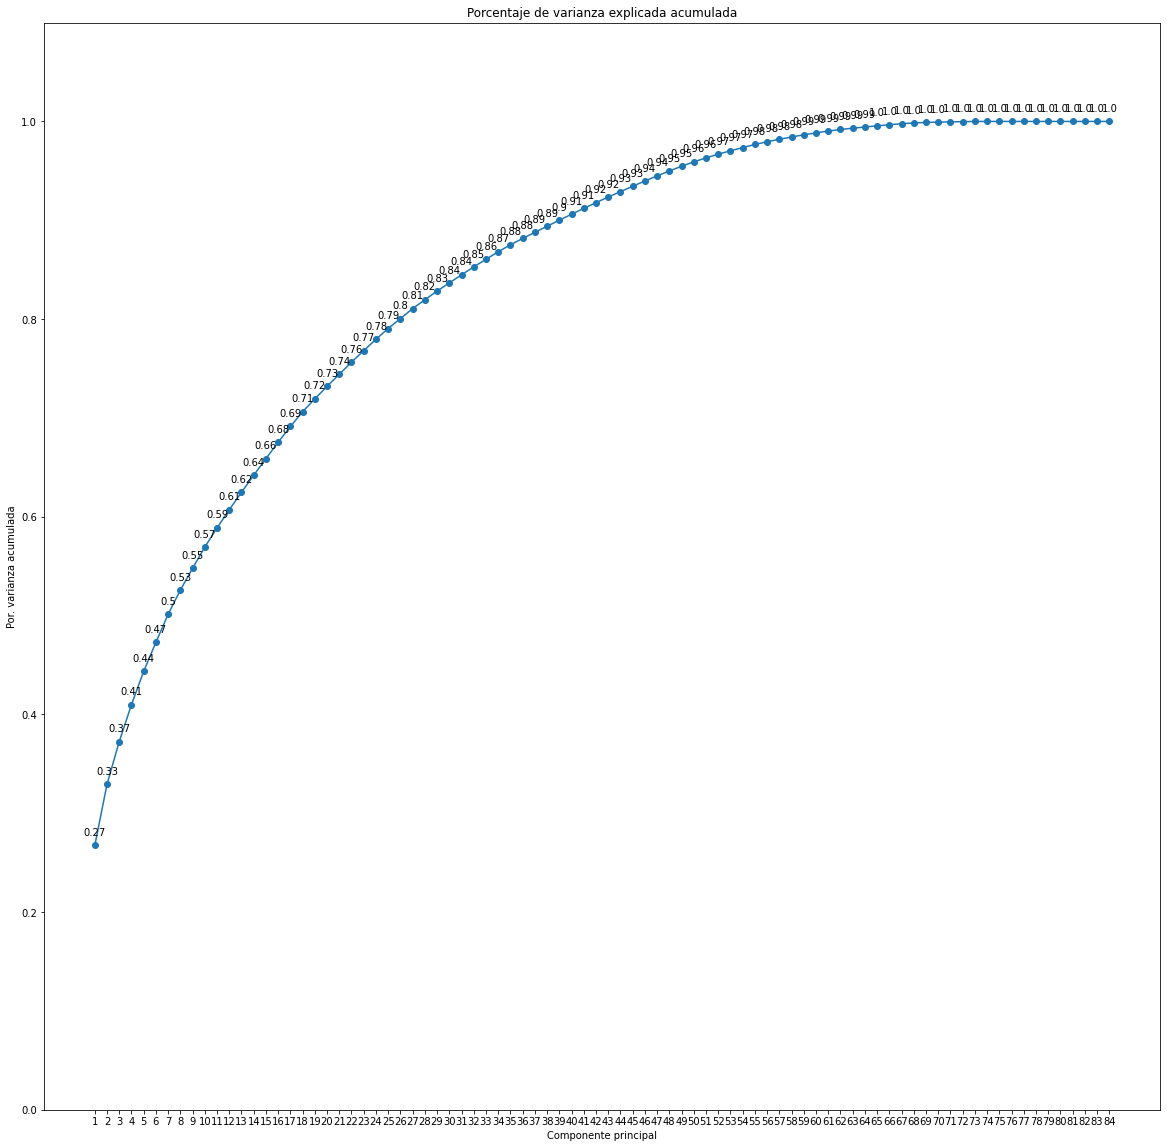

In [62]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
ax.plot(
    np.arange(len(test4.columns[:])) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(test4.columns[:])) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

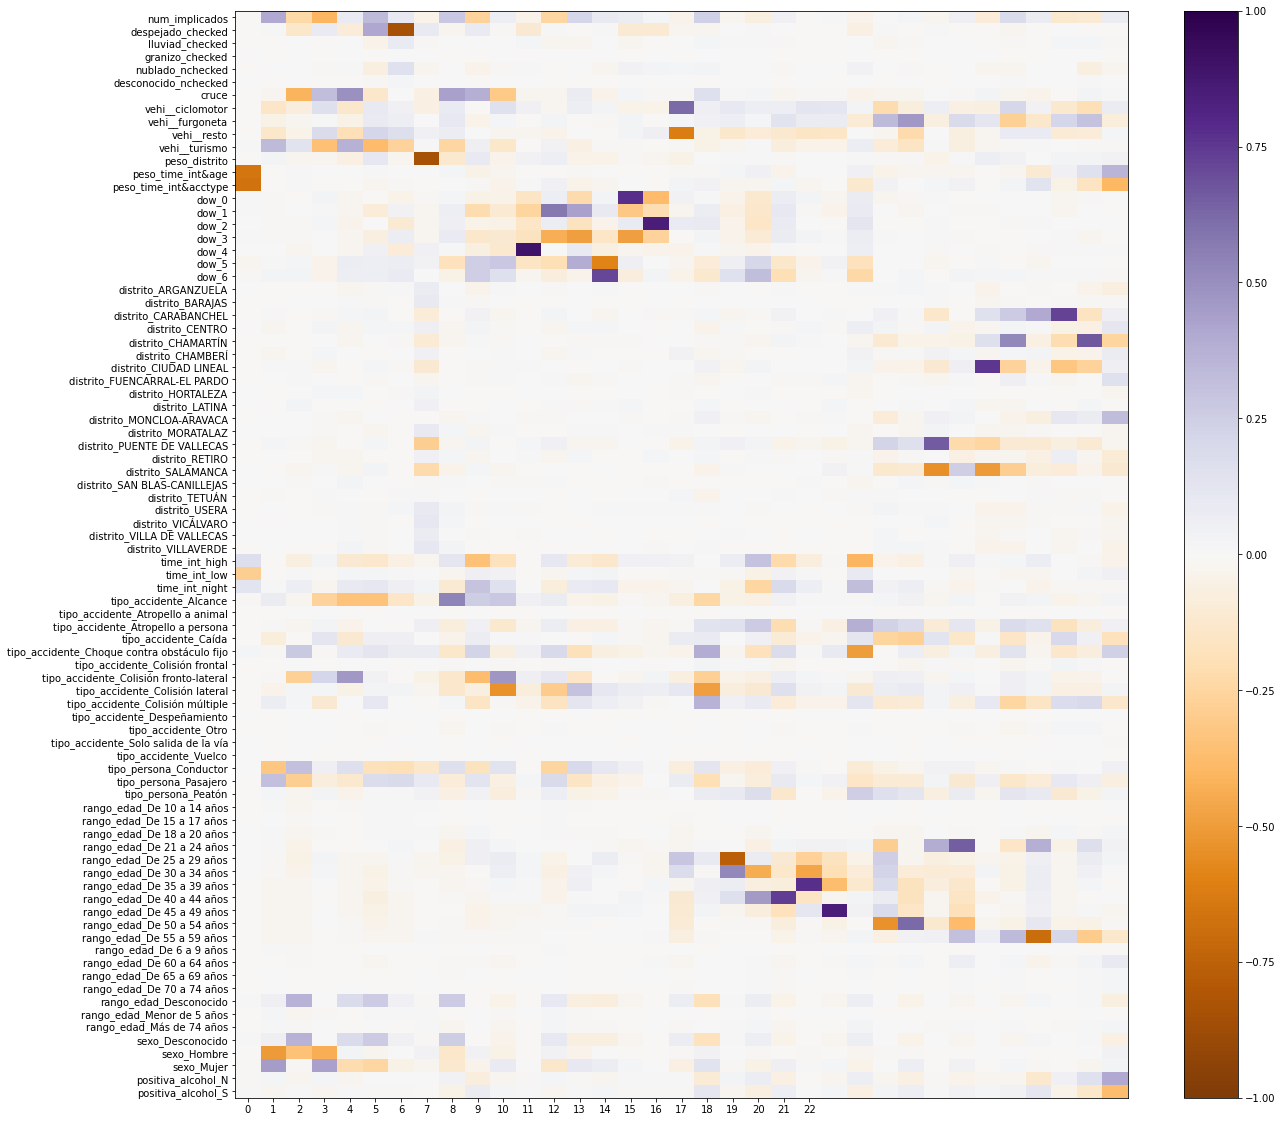

In [63]:
# We will take 35 PCAs (it correspond to the 0.87% of cumulative variance)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
componentes = modelo_pca.components_
plt.imshow(componentes[0:35].T, cmap='PuOr', aspect='auto',vmin = -1,vmax = 1)
plt.yticks(range(len(test4.columns[:])), test4.columns[:])
plt.xticks(range(23))
plt.grid(False)
plt.colorbar();

In [64]:
proyecciones = pca_pipe.transform(test4)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = [pcas],
    index   = test4.index
              )
proyecciones

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83
0,2.311249,0.672421,-0.321547,0.374881,0.520927,0.114049,-0.335489,-0.574473,-0.064309,0.041766,0.345464,0.612455,-0.299841,0.324628,0.132517,-0.023844,-0.054096,-0.106311,0.115365,0.318471,-0.555948,0.059136,-0.266363,-0.142386,0.260666,0.335383,0.140809,0.350211,-0.205623,-0.176555,0.005039,-0.088801,-0.091354,-0.057389,0.137063,-0.074019,-0.060569,0.029865,-0.034791,-0.002757,0.030318,0.020788,0.056353,-0.082654,0.147355,-0.034198,0.025797,-0.033275,-0.051283,-0.030762,-0.024867,-0.028189,-0.024038,0.010537,-0.004022,0.022633,0.004566,-0.005212,0.004065,0.006840,-0.005417,0.013230,0.091934,0.021384,-0.000128,0.004939,-0.006388,0.007011,-0.000602,0.001534,0.000992,0.004518,0.003823,0.000598,-0.000679,0.000092,-1.490772e-14,-6.649128e-15,-1.924479e-15,6.560820e-15,9.429849e-16,4.674701e-16,-7.147061e-16,-1.401657e-15
1,2.332211,0.011210,-0.549281,-0.239256,0.693286,0.276451,-0.296380,-0.526118,-0.079394,0.080711,0.223903,0.606617,-0.167043,0.232540,0.074611,-0.041249,-0.031291,-0.213719,0.087344,0.006285,-0.266286,0.062791,0.579591,-0.285138,0.252890,0.298346,0.035610,0.363000,-0.262178,-0.195787,-0.005018,-0.081085,-0.094944,-0.063686,0.125787,-0.054143,-0.064537,0.015130,-0.069672,-0.001769,0.031992,0.020347,0.054710,-0.082272,0.141899,-0.041937,0.026662,-0.035164,-0.054517,-0.024289,-0.037799,-0.030457,-0.033030,0.011557,-0.000515,0.021135,0.003959,-0.013315,-0.004446,0.005955,-0.007975,0.010104,0.096233,0.016844,-0.006189,0.003060,-0.007519,0.003958,-0.001010,0.001267,0.002318,0.004552,0.003164,0.000530,-0.000609,0.000044,-1.460413e-14,-5.492351e-15,-2.300767e-15,6.609856e-15,3.590948e-16,9.025177e-16,-1.075529e-15,-1.096345e-15
2,1.776383,0.444775,0.222764,0.066346,0.950242,0.690930,-0.230711,-0.557461,0.401857,0.022601,0.171029,0.594227,-0.032828,0.126242,-0.025565,-0.062405,-0.052852,-0.109988,-0.234341,-0.012303,-0.090873,0.028827,0.038152,-0.043658,0.477255,0.140333,0.094655,0.407734,-0.221957,-0.194749,-0.031439,-0.187855,-0.036105,0.060892,0.333145,-0.157891,-0.034622,-0.120113,0.308611,-0.241886,0.040055,-0.027119,0.174332,-0.063628,0.079111,-0.089973,0.001068,-0.041372,-0.063751,-0.036562,0.013149,-0.038880,-0.019510,0.014013,0.013255,0.000193,-0.012856,-0.007799,-0.000914,0.009975,0.002889,0.014930,-0.170009,-0.046790,0.010650,0.013016,0.022224,-0.004832,-0.004333,-0.002198,-0.005840,-0.014838,0.004565,0.000649,-0.001320,-0.000081,-1.514319e-14,-6.089096e-15,-2.510669e-15,3.896749e-15,1.578669e-16,5.000618e-16,-9.992007e-16,-1.144917e-15
3,2.805112,0.470616,-0.961083,-0.333708,0.514611,0.558001,-0.011939,-0.369112,-0.249769,0.333100,0.084633,0.615346,0.179446,-0.045409,-0.048337,-0.097418,-0.049725,-0.078438,-0.167648,-0.025548,-0.240982,0.173773,0.055459,-0.000012,0.268377,0.171038,0.109668,0.424625,-0.265656,-0.142899,-0.054458,-0.112600,-0.060512,-0.152891,-0.205690,0.053785,-0.065900,0.094072,-0.321969,0.137134,-0.028177,0.033332,-0.057139,-0.019578,0.076293,0.122452,0.062167,-0.051747,-0.029207,-0.023484,-0.058898,-0.028244,-0.015964,0.010752,-0.009293,0.047670,0.105660,0.022285,0.007415,0.013873,0.076440,0.011858,0.184679,0.676346,-0.244180,-0.018324,-0.133171,-0.016828,-0.008683,0.004194,0.012539,-0.005543,0.002429,0.000364,-0.000260,0.000014,-1.405509e-14,-4.507028e-15,-2.217501e-15,7.759978e-15,1.231724e-16,1.270279e-15,-1.179612e-15,-1.214306e-15
4,2.318651,1.107692,-0.729794,0.279349,0.334738,0.367414,-0.064940,-0.416796,-0.231447,0.243360,0.178206,0.619106,0.027775,0.083986,0.008683,-0.082769,-0.034700,-0.138447,-0.066106,0.022464,-0.286282,0.131178,0.615647,-0.237455,0.204450,0.277148,0.028637,0.

In [65]:
X_train=proyecciones[pcas[:35]]
X_train

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,2.311249,0.672421,-0.321547,0.374881,0.520927,0.114049,-0.335489,-0.574473,-0.064309,0.041766,0.345464,0.612455,-0.299841,0.324628,0.132517,-0.023844,-0.054096,-0.106311,0.115365,0.318471,-0.555948,0.059136,-0.266363,-0.142386,0.260666,0.335383,0.140809,0.350211,-0.205623,-0.176555,0.005039,-0.088801,-0.091354,-0.057389,0.137063
1,2.332211,0.011210,-0.549281,-0.239256,0.693286,0.276451,-0.296380,-0.526118,-0.079394,0.080711,0.223903,0.606617,-0.167043,0.232540,0.074611,-0.041249,-0.031291,-0.213719,0.087344,0.006285,-0.266286,0.062791,0.579591,-0.285138,0.252890,0.298346,0.035610,0.363000,-0.262178,-0.195787,-0.005018,-0.081085,-0.094944,-0.063686,0.125787
2,1.776383,0.444775,0.222764,0.066346,0.950242,0.690930,-0.230711,-0.557461,0.401857,0.022601,0.171029,0.594227,-0.032828,0.126242,-0.025565,-0.062405,-0.052852,-0.109988,-0.234341,-0.012303,-0.090873,0.028827,0.038152,-0.043658,0.477255,0.140333,0.094655,0.407734,-0.221957,-0.194749,-0.031439,-0.187855,-0.036105,0.060892,0.333145
3,2.805112,0.470616,-0.961083,-0.333708,0.514611,0.558001,-0.011939,-0.369112,-0.249769,0.333100,0.084633,0.615346,0.179446,-0.045409,-0.048337,-0.097418,-0.049725,-0.078438,-0.167648,-0.025548,-0.240982,0.173773,0.055459,-0.000012,0.268377,0.171038,0.109668,0.424625,-0.265656,-0.142899,-0.054458,-0.112600,-0.060512,-0.152891,-0.205690
4,2.318651,1.107692,-0.729794,0.279349,0.334738,0.367414,-0.064940,-0.416796,-0.231447,0.243360,0.178206,0.619106,0.027775,0.083986,0.008683,-0.082769,-0.034700,-0.138447,-0.066106,0.022464,-0.286282,0.131178,0.615647,-0.237455,0.204450,0.277148,0.028637,0.358422,-0.337484,-0.150840,-0.091369,-0.144752,-0.036266,-0.045488,0.043985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41775,-0.604331,-0.337357,0.150622,-0.252606,0.009363,-0.198871,-0.290825,0.839978,-0.140128,-0.228491,-0.108794,-0.191439,-0.329277,-0.346872,-0.028097,-0.347495,-0.194732,-0.028051,0.041090,-0.025778,-0.097252,-0.127889,0.086520,0.553246,0.124119,0.104109,-0.138969,0.068781,-0.152962,-0.077740,-0.124621,0.000445,0.031501,0.018589,-0.068964
41776,2.191427,-0.878667,-0.188197,0.560056,-0.084382,0.183997,-0.039813,0.880573,0.004699,0.641722,0.025702,0.562958,-0.161838,0.197890,0.137906,-0.085865,-0.064028,-0.208306,0.220482,-0.665906,-0.224623,-0.024108,-0.240058,-0.197977,0.337285,0.055491,-0.165739,0.108996,-0.181973,-0.007825,-0.226690,0.034900,0.082548,-0.038048,-0.530656
41777,-0.522979,-0.059650,0.790214,0.061171,-0.272582,0.271797,0.476047,0.753926,0.959497,-0.165890,0.186701,0.638523,0.032876,0.044408,-0.096164,0.051686,0.065236,-0.342925,-0.360991,-0.122801,-0.058885,-0.086714,-0.088607,-0.109679,0.159952,0.042807,-0.083591,0.041548,-0.002454,-0.104964,0.020507,0.105779,-0.109565,-0.100481,-0.149558
41778,-0.507972,0.255390,0.930472,-0.324440,0.126676,-0.141925,0.181012,0.731164,0.715466,-0.081369,0.121358,0.666045,0.066405,0.009271,-0.093418,0.016684,0.018036,0.067876,-0.292690,-0.069997,-0.031298,-0.014517,-0.006510,-0.027148,0.161932,0.022947,0.006012,0.054391,0.021223,-0.087437,-0.022636,0.138686,-0.067826,-0.147194,-0.446910


In [71]:
# Now we are ready to go 
X_train

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,2.311249,0.672421,-0.321547,0.374881,0.520927,0.114049,-0.335489,-0.574473,-0.064309,0.041766,0.345464,0.612455,-0.299841,0.324628,0.132517,-0.023844,-0.054096,-0.106311,0.115365,0.318471,-0.555948,0.059136,-0.266363,-0.142386,0.260666,0.335383,0.140809,0.350211,-0.205623,-0.176555,0.005039,-0.088801,-0.091354,-0.057389,0.137063
1,2.332211,0.011210,-0.549281,-0.239256,0.693286,0.276451,-0.296380,-0.526118,-0.079394,0.080711,0.223903,0.606617,-0.167043,0.232540,0.074611,-0.041249,-0.031291,-0.213719,0.087344,0.006285,-0.266286,0.062791,0.579591,-0.285138,0.252890,0.298346,0.035610,0.363000,-0.262178,-0.195787,-0.005018,-0.081085,-0.094944,-0.063686,0.125787
2,1.776383,0.444775,0.222764,0.066346,0.950242,0.690930,-0.230711,-0.557461,0.401857,0.022601,0.171029,0.594227,-0.032828,0.126242,-0.025565,-0.062405,-0.052852,-0.109988,-0.234341,-0.012303,-0.090873,0.028827,0.038152,-0.043658,0.477255,0.140333,0.094655,0.407734,-0.221957,-0.194749,-0.031439,-0.187855,-0.036105,0.060892,0.333145
3,2.805112,0.470616,-0.961083,-0.333708,0.514611,0.558001,-0.011939,-0.369112,-0.249769,0.333100,0.084633,0.615346,0.179446,-0.045409,-0.048337,-0.097418,-0.049725,-0.078438,-0.167648,-0.025548,-0.240982,0.173773,0.055459,-0.000012,0.268377,0.171038,0.109668,0.424625,-0.265656,-0.142899,-0.054458,-0.112600,-0.060512,-0.152891,-0.205690
4,2.318651,1.107692,-0.729794,0.279349,0.334738,0.367414,-0.064940,-0.416796,-0.231447,0.243360,0.178206,0.619106,0.027775,0.083986,0.008683,-0.082769,-0.034700,-0.138447,-0.066106,0.022464,-0.286282,0.131178,0.615647,-0.237455,0.204450,0.277148,0.028637,0.358422,-0.337484,-0.150840,-0.091369,-0.144752,-0.036266,-0.045488,0.043985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41775,-0.604331,-0.337357,0.150622,-0.252606,0.009363,-0.198871,-0.290825,0.839978,-0.140128,-0.228491,-0.108794,-0.191439,-0.329277,-0.346872,-0.028097,-0.347495,-0.194732,-0.028051,0.041090,-0.025778,-0.097252,-0.127889,0.086520,0.553246,0.124119,0.104109,-0.138969,0.068781,-0.152962,-0.077740,-0.124621,0.000445,0.031501,0.018589,-0.068964
41776,2.191427,-0.878667,-0.188197,0.560056,-0.084382,0.183997,-0.039813,0.880573,0.004699,0.641722,0.025702,0.562958,-0.161838,0.197890,0.137906,-0.085865,-0.064028,-0.208306,0.220482,-0.665906,-0.224623,-0.024108,-0.240058,-0.197977,0.337285,0.055491,-0.165739,0.108996,-0.181973,-0.007825,-0.226690,0.034900,0.082548,-0.038048,-0.530656
41777,-0.522979,-0.059650,0.790214,0.061171,-0.272582,0.271797,0.476047,0.753926,0.959497,-0.165890,0.186701,0.638523,0.032876,0.044408,-0.096164,0.051686,0.065236,-0.342925,-0.360991,-0.122801,-0.058885,-0.086714,-0.088607,-0.109679,0.159952,0.042807,-0.083591,0.041548,-0.002454,-0.104964,0.020507,0.105779,-0.109565,-0.100481,-0.149558
41778,-0.507972,0.255390,0.930472,-0.324440,0.126676,-0.141925,0.181012,0.731164,0.715466,-0.081369,0.121358,0.666045,0.066405,0.009271,-0.093418,0.016684,0.018036,0.067876,-0.292690,-0.069997,-0.031298,-0.014517,-0.006510,-0.027148,0.161932,0.022947,0.006012,0.054391,0.021223,-0.087437,-0.022636,0.138686,-0.067826,-0.147194,-0.446910
